# Atividade 6
* Objetivo: Utilizar o algoritmo K-Means para analisar dados de alunos do sistema LOP

## Importação da biblioteca e visualização do dataframe

In [1]:
import pandas as pd

dataframe = pd.read_csv('https://raw.githubusercontent.com/ect-comp/ml/refs/heads/master/dados/metricas_lop.csv')

dataframe

,user_id,submissao_list_id01,numero_de_questoes_list_id01,acertos_list_id01,media_submissoes_list_id01,totalmente_erradas_list_id01,parcialmente_erradas_list_id01,totalmente_certas_list_id01,tempo_total_gasto_list_id01,tempo_medio_gasto_list_id01,...,parcialmente_erradas_list_id15,totalmente_certas_list_id15,tempo_total_gasto_list_id15,tempo_medio_gasto_list_id15,tempo_desvio_padrao_list_id15,percentual_questoes_certas_list_id15,sum_char_by_list_list_id15,mean_char_by_list_list_id15,std_char_by_list_list_id15,submeteu_list_id15
0,006cdbb7-4f79-44fe-9fb9-b065fb05c21d,82.0,5.0,5.0,82.0,64.0,13.0,5.0,1.120332e+08,1.366258e+06,...,0.0,16.0,1403955.0,87747.187500,37526.658718,100.000000,16.0,1.000000,0.000000,True
1,006fc810-ad92-4c66-bf5b-e87ae4d8a64d,17.0,4.0,2.0,17.0,15.0,0.0,2.0,1.624323e+07,9.554839e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,008ea985-d303-481f-856e-6fcc68e7fb6a,53.0,5.0,11.0,53.0,37.0,5.0,11.0,3.190137e+07,6.019126e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00997626-71a4-497c-bc2f-18b3b899d4f9,21.0,5.0,6.0,21.0,15.0,0.0,6.0,4.613666e+06,2.196984e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00cc9a3c-eab0-4de1-aa2a-3f7da303ede5,43.0,5.0,5.0,43.0,34.0,0.0,5.0,1.176261e+09,2.735491e+07,...,0.0,7.0,41822588.0,909186.695652,411653.112523,15.217391,12954.0,281.608696,113.318720,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,04914479-d24e-4bb6-9f78-082ad80c2118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2161,24717d03-f014-4f41-a504-4f03b31831c7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.0,2104539.0,191321.727273,257945.208081,63.636364,17.0,1.545455,0.687552,True
2162,41e2e8e8-f8fb-4950-8651-b3bccdda8337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7.0,176061.0,25151.571429,15598.837829,100.000000,7.0,1.000000,0.000000,True
2163,bfec88af-0923-4fdc-adad-e1ad10ec6d3d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dataframe.describe()

,submissao_list_id01,numero_de_questoes_list_id01,acertos_list_id01,media_submissoes_list_id01,totalmente_erradas_list_id01,parcialmente_erradas_list_id01,totalmente_certas_list_id01,tempo_total_gasto_list_id01,tempo_medio_gasto_list_id01,tempo_desvio_padrao_list_id01,...,totalmente_erradas_list_id15,parcialmente_erradas_list_id15,totalmente_certas_list_id15,tempo_total_gasto_list_id15,tempo_medio_gasto_list_id15,tempo_desvio_padrao_list_id15,percentual_questoes_certas_list_id15,sum_char_by_list_list_id15,mean_char_by_list_list_id15,std_char_by_list_list_id15
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2.129000e+03,2.129000e+03,2.118000e+03,...,1071.000000,1071.000000,1071.000000,1.071000e+03,1.071000e+03,1.062000e+03,1071.000000,1071.000000,1071.000000,1062.000000
mean,35.387506,4.841240,7.318929,35.387506,24.915923,1.230625,7.318929,6.371503e+07,1.047287e+06,1.105634e+06,...,11.752568,1.901961,8.066293,2.681242e+07,7.888684e+05,7.729399e+05,56.974479,6093.358543,172.327431,83.663757
std,30.281661,0.668272,4.076596,30.281661,25.921131,3.145124,4.076596,5.024236e+08,4.815334e+06,8.437895e+06,...,16.589982,4.237428,12.914250,7.672090e+07,1.872455e+06,2.708586e+06,29.873813,15935.677508,168.483471,111.565152
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.852866e+08,-3.088109e+06,1.563259e+03,...,0.000000,0.000000,0.000000,4.901000e+03,2.139571e+03,3.967604e+02,0.000000,1.000000,0.888889,0.000000
25%,16.000000,5.000000,5.000000,16.000000,8.000000,0.000000,5.000000,5.675952e+06,3.229482e+05,1.968586e+05,...,1.000000,0.000000,7.000000,9.104285e+05,9.029011e+04,5.720519e+04,32.503193,94.500000,8.401786,5.975628
50%,26.000000,5.000000,6.000000,26.000000,17.000000,0.000000,6.000000,1.400641e+07,5.282720e+05,3.555524e+05,...,6.000000,0.000000,7.000000,5.779403e+06,3.856888e+05,2.083594e+05,50.001667,2233.000000,176.714286,61.158563
75%,45.000000,5.000000,8.000000,45.000000,32.000000,1.000000,8.000000,3.484790e+07,8.923806e+05,6.841013e+05,...,16.000000,2.000000,8.000000,1.991620e+07,8.005501e+05,5.074247e+05,87.500000,5861.000000,260.644231,110.012126
max,276.000000,5.000000,62.000000,276.000000,232.000000,39.000000,62.000000,1.894460e+10,1.552836e+08,2.583030e+08,...,162.000000,44.000000,411.000000,1.020485e+09,3.561275e+07,4.044705e+07,100.000000,356278.000000,1263.397163,1208.717275


## Seleção dos atributos para análise

In [3]:
X = dataframe[['tempo_total_gasto_list_id01','percentual_questoes_certas_list_id01']].dropna().values
X

array([[1.12033186e+08, 1.00609756e+01],
       [1.62432270e+07, 1.17647059e+01],
       [3.19013680e+07, 2.31132075e+01],
       ...,
       [2.45406272e+08, 2.71186441e+01],
       [6.98718700e+06, 4.10000000e+01],
       [1.36640951e+08, 1.26984127e+01]])

In [5]:
print(X[:5])

[[1.12033186e+08 1.00609756e+01]
 [1.62432270e+07 1.17647059e+01]
 [3.19013680e+07 2.31132075e+01]
 [4.61366600e+06 2.85714286e+01]
 [1.17626134e+09 1.28205128e+01]]


## Pré-processamento dos dados

### Remoção de "outliers"

In [6]:
# prompt: Remova os valores extremos para o "tempo_total_gasto_list_id01"

# Calculando quantis para remover "outliers"
Q1 = dataframe['tempo_total_gasto_list_id01'].quantile(0.25)
Q3 = dataframe['tempo_total_gasto_list_id01'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
dataframe_filtered = dataframe[
    (dataframe['tempo_total_gasto_list_id01'] >= lower_bound) &
    (dataframe['tempo_total_gasto_list_id01'] <= upper_bound)
]

X = dataframe_filtered[['tempo_total_gasto_list_id01','percentual_questoes_certas_list_id01']].dropna().values
print(X[:5])

[[1.62432270e+07 1.17647059e+01]
 [3.19013680e+07 2.31132075e+01]
 [4.61366600e+06 2.85714286e+01]
 [5.94090000e+06 3.28947368e+01]
 [4.64228030e+07 9.67741935e+00]]


### Normalização MinMax

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
print(X_norm[:5])

[[0.31243713 0.11764706]
 [0.48530377 0.23113208]
 [0.18404621 0.28571429]
 [0.19869894 0.32894737]
 [0.64562112 0.09677419]]


## Definição e execução do modelo K-Means
* Número de clusters: 5

In [8]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_norm)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

print(labels)

print(centroids)

[2 1 2 ... 4 1 4]
[[0.17066917 0.82844478]
 [0.44520484 0.21180118]
 [0.24830517 0.26697262]
 [0.77865283 0.17665158]
 [0.20665101 0.50180541]]


## Gráfico de dispersão

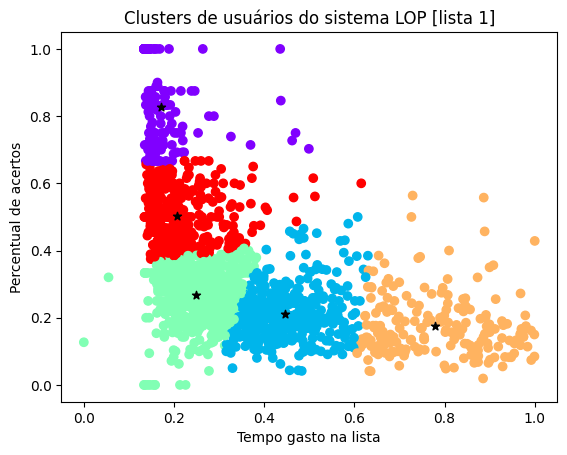

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', color='black')
plt.xlabel('Tempo gasto na lista')
plt.ylabel('Percentual de acertos')
plt.title('Clusters de usuários do sistema LOP [lista 1]')
plt.show()